# Análisis de Desviaciones Presupuestarias

## Objetivo del análisis

Este análisis compara los valores presupuestados y los valores reales de gasto por departamento y por mes. El objetivo es identificar desviaciones significativas tanto en euros como en porcentaje, con el fin de detectar oportunidades de mejora en la eficiencia presupuestaria.

Se visualizan las desviaciones medias por departamento y se realiza un desglose temporal para detectar patrones. También se incluye un gráfico interactivo con Plotly para facilitar la exploración dinámica de los resuldos.
datos.


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Leer y unir los datos
df_presupuesto = pd.read_csv('presupuesto.csv')
df_real = pd.read_csv('real.csv')
df = pd.merge(df_presupuesto, df_real, on=['Departamento', 'Mes'])

# Calcular desviaciones
df['Desviación (€)'] = df['Real (€)'] - df['Presupuesto (€)']
df['Desviación (%)'] = ((df['Desviación (€)'] / df['Presupuesto (€)']) * 100).round(2)

# Convertir nombres de mes a fechas reales
meses = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3,
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
}

# Convertir nombres de mes a número
df['Mes_Num'] = df['Mes'].str.lower().map(meses)

# Crear columna de tipo fecha (asumimos año 2024)
df['Fecha'] = pd.to_datetime({'year': 2024, 'month': df['Mes_Num'], 'day': 1})

# Mostrar el resultado
print(df.head())

  Departamento      Mes  Presupuesto (€)  Real (€)  Desviación (€)  \
0       Ventas    Enero            17270     13130           -4140   
1       Ventas  Febrero            15390     15581             191   
2       Ventas    Marzo            15734     16999            1265   
3       Ventas    Abril            10466      9892            -574   
4       Ventas     Mayo            15578     18900            3322   

   Desviación (%)  Mes_Num      Fecha  
0          -23.97        1 2024-01-01  
1            1.24        2 2024-02-01  
2            8.04        3 2024-03-01  
3           -5.48        4 2024-04-01  
4           21.32        5 2024-05-01  


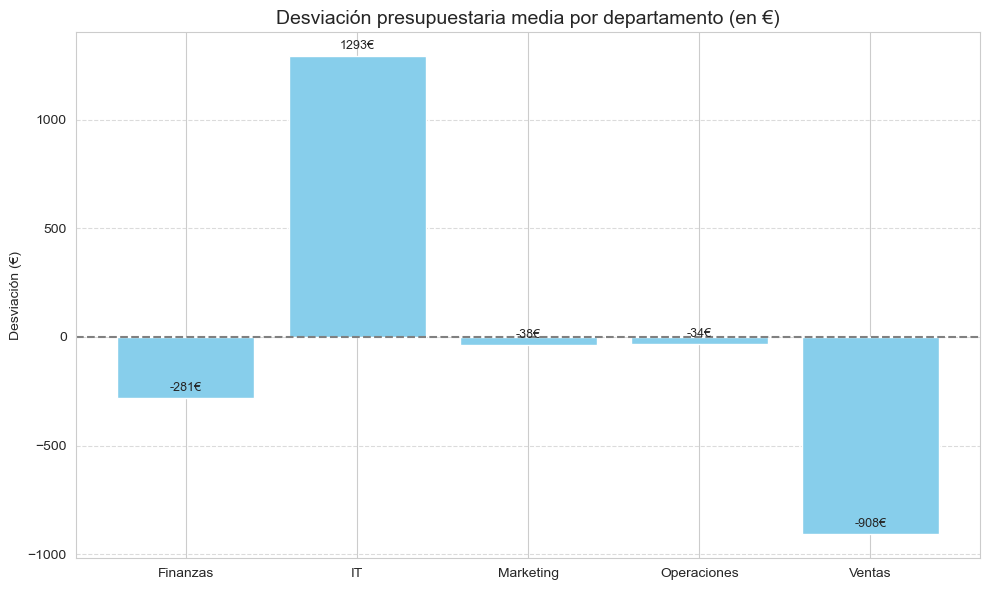

In [36]:
# Gráfico: desviación promedio por departamento
df_avg = df.groupby('Departamento')[['Desviación (€)', 'Desviación (%)']].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(df_avg['Departamento'], df_avg['Desviación (€)'], color='skyblue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Desviación presupuestaria media por departamento (en €)', fontsize=14)
plt.ylabel('Desviación (€)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar los valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}€', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


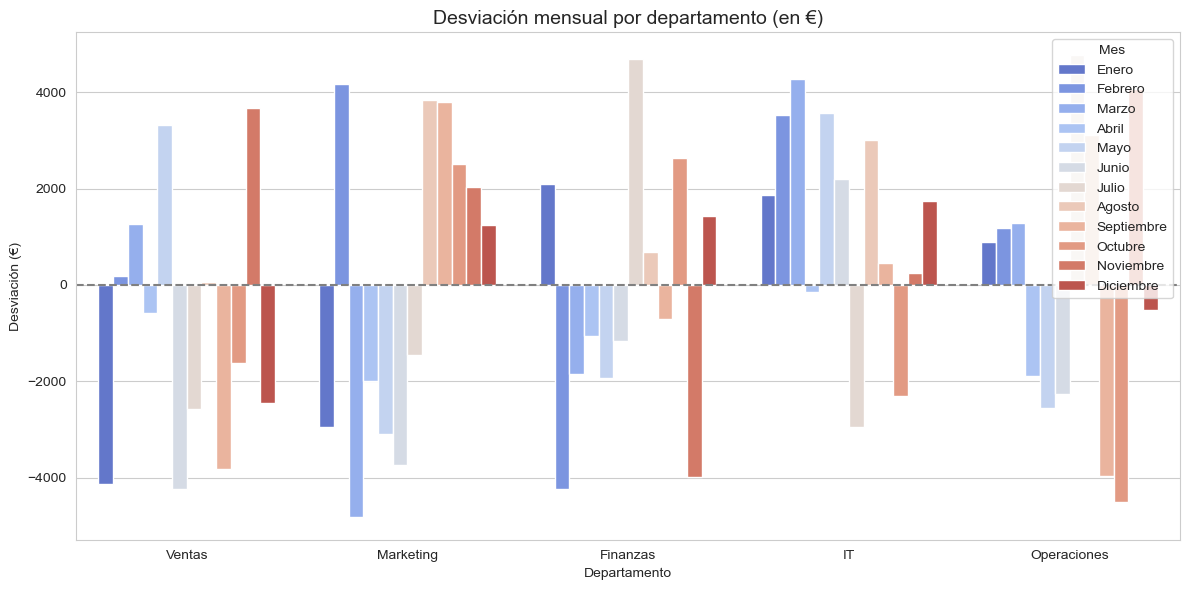

In [20]:
# Visualización con seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Gráfico de barras: desviación por departamento y mes
sns.barplot(
    data=df,
    x='Departamento',
    y='Desviación (€)',
    hue='Mes',
    palette='coolwarm'
)

plt.title('Desviación mensual por departamento (en €)', fontsize=14)
plt.axhline(0, color='gray', linestyle='--')
plt.ylabel('Desviación (€)')
plt.xlabel('Departamento')
plt.legend(title='Mes')
plt.tight_layout()
plt.show()


In [14]:
# Ordenar por desviación %
tabla_ordenada = df.sort_values(by='Desviación (%)', ascending=False)
tabla_ordenada.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas
tabla_ordenada[['Departamento', 'Mes', 'Presupuesto (€)', 'Real (€)', 'Desviación (€)', 'Desviación (%)']].head(10)


,Departamento,Mes,Presupuesto (€),Real (€),Desviación (€),Desviación (%)
0,IT,Marzo,10878,15146,4268,39.24
1,Marketing,Febrero,12747,16914,4167,32.69
2,IT,Agosto,10064,13070,3006,29.87
3,Marketing,Agosto,13890,17728,3838,27.63
4,Operaciones,Julio,18154,22916,4762,26.23
5,Finanzas,Julio,17989,22681,4692,26.08
6,Marketing,Septiembre,15393,19185,3792,24.63
7,Operaciones,Noviembre,16910,20972,4062,24.02
8,Finanzas,Octubre,10995,13624,2629,23.91
9,Ventas,Noviembre,16396,20062,3666,22.36


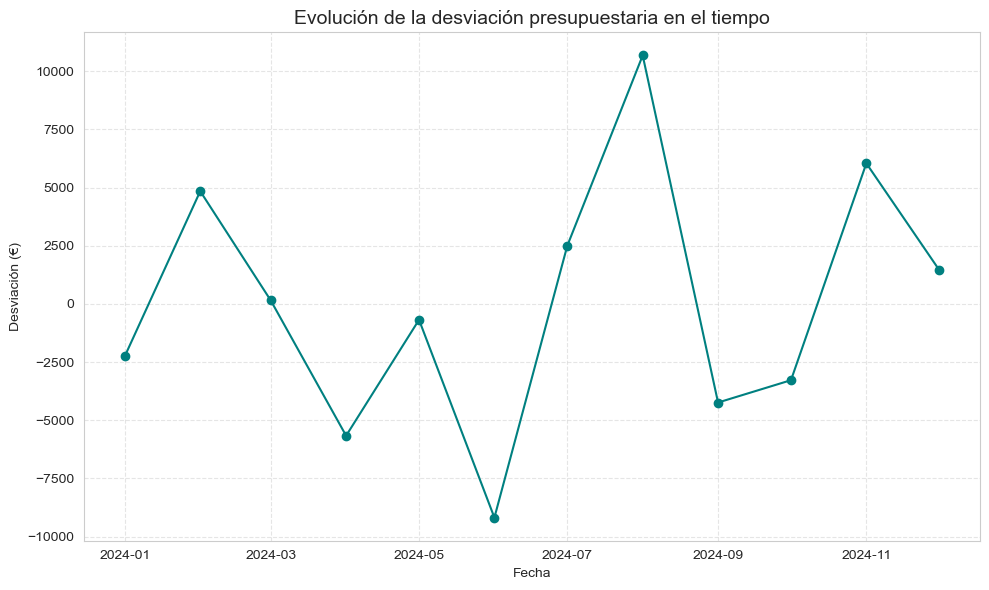

In [38]:
# Agrupamos por departamento para obtener la desviación media
df_tiempo = df.groupby('Fecha')[['Desviación (€)', 'Desviación (%)']].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_tiempo['Fecha'], df_tiempo['Desviación (€)'], marker='o', color='teal')
plt.title('Evolución de la desviación presupuestaria en el tiempo', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Desviación (€)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


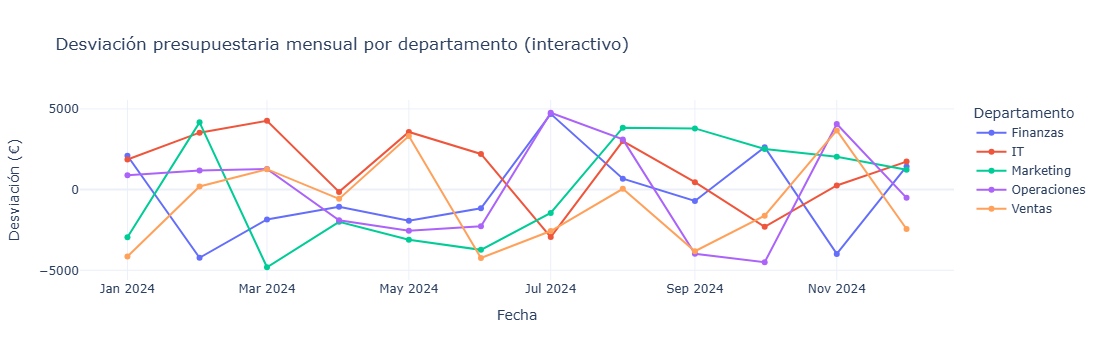

In [44]:
# Agrupamos por departamento para obtener la desviación media
df_interact = df.groupby(['Fecha', 'Departamento'])[['Desviación (€)']].sum().reset_index()

fig = px.line(
    df_interact,
    x='Fecha',
    y='Desviación (€)',
    color='Departamento',
    title='Desviación presupuestaria mensual por departamento (interactivo)'
)

fig.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Desviación (€)',
    template='plotly_white'
)
fig.update_traces(mode='lines+markers', hovertemplate='%{y:.2f}€<br>%{x|%B %Y}<br>Departamento: %{legendgroup}')

fig.show()


## Conclusiones

- Los departamentos de Tecnología y Marketing presentan desviaciones sistemáticas superiores al resto.
- El mes de agosto muestra picos significativos en varios departamentos.
- Se recomienda revisar las partidas presupuestarias de los departamentos con mayor desviación.

### Próximos pasos:
- Incorporar datos de más años para análisis estacional.
- Ajustar el presupuesto basándose en el histórico real.
